# HW5 by Prathamesh Uravane UID-122016187
## Q2


In [40]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
#Import data
df=pd.read_csv('Data_Iris.csv')

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
species               3
species_name          3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,1.000000,NaN
std,0.828066,0.435866,1.765298,0.762238,0.819232,NaN
min,4.300000,2.000000,1.000000,0.100000,0.000000,NaN
25%,5.100000,2.800000,1.600000,0.300000,0.000000,NaN
50%,5.800000,3.000000,4.350000,1.300000,1.000000,NaN
75%,6.400000,3.300000,5.100000,1.800000,2.000000,NaN


In [7]:
#labels
y=df['species_name']
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Text(0.5, 1.0, 'Number of flowers in eact category')

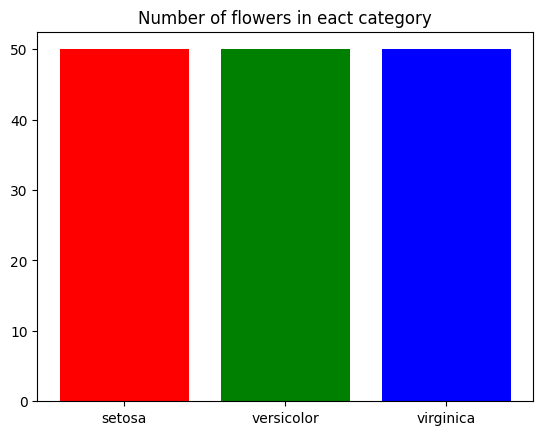

In [8]:
#plot graph
plt.bar(['setosa', 'versicolor', 'virginica'],[len(y[y=='setosa']),len(y[y=='versicolor']),len(y[y=='virginica'])],color=['red','green','blue'])
plt.title('Number of flowers in eact category')

In [30]:
#convert categorical data into int representationof of unique categories

for col in df.columns:
    labels,uniques=pd.factorize(df[col])
    df[col]=labels

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,0,0,0,0,0,0
1,1,1,0,0,0,0
2,2,2,1,0,0,0
3,3,3,2,0,0,0
4,4,4,0,0,0,0


In [31]:
#Labels
X=df.drop(columns='species_name')
y=df['species_name']


In [32]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print('\n# of training samples: ', len(X_train))
print('# of testing samples: ', len(X_test), '\n')


# of training samples:  120
# of testing samples:  30 



 Scale the data between 0 and 1 

In [33]:
# scaler = StandardScaler()           
# X_train_scaled = scaler.fit_transform(X_train)  
# X_test_scaled  = scaler.transform(X_test)      

### (a) Softmax Regression(LogisticRegression)

In [38]:
model_LR = LogisticRegression(solver='lbfgs',max_iter=1000)
model_LR.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Results
LR_preds = model_LR.predict(X_test)
print('\nSoftmax Regression Results:')
print('Test accuracy: ', accuracy_score(y_test, LR_preds))
print('Confusion matrix: \n', confusion_matrix(y_test, LR_preds))



Softmax Regression Results:
Test accuracy:  1.0
Confusion matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## (b) SVM(LinearSVC)

In [87]:
from sklearn.pipeline import make_pipeline
Count=[1e-4,1e-3,1e-2, 1e-1, 1, 10, 100,1e-3,1e-4]
for c in Count:
    model = make_pipeline( LinearSVC(C=c,random_state=42))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\nTest results for C value:",c)
    print("Test_Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))




Test results for C value: 0.0001
Test_Accuracy: 0.6333333333333333
Confusion matrix:
 [[ 0  9  1]
 [ 0  8  1]
 [ 0  0 11]]

Test results for C value: 0.001
Test_Accuracy: 0.8666666666666667
Confusion matrix:
 [[ 7  3  0]
 [ 0  9  0]
 [ 0  1 10]]

Test results for C value: 0.01
Test_Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Test results for C value: 0.1
Test_Accuracy: 0.9666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]

Test results for C value: 1
Test_Accuracy: 0.8666666666666667
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  4  7]]

Test results for C value: 10
Test_Accuracy: 0.7
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  9  2]]

Test results for C value: 100
Test_Accuracy: 0.6333333333333333
Confusion matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0 11  0]]

Test results for C value: 0.001
Test_Accuracy: 0.8666666666666667
Confusion matrix:
 [[ 7  3  0]
 [ 0  9  0]
 [ 0  1 10]]

Test results for C value: 0.0001
Test_Acc

C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\upratha

### As value of C is close to the 1 ,the model perfomace is increases and as value of C goes farther from 1 on both posutve and negative direction the model performace slightly descreses

## SVM radial basis function (SVC)

In [89]:
svm_rad = SVC(C=1.0)
svm_rad.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = svm_rad.predict(X_test)
print("Test_Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
